<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter14/Using_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Pretrained Models from Keras**

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 2s 0us/step


In [6]:
model

# **Resizing the images for our model**

In [7]:
images = np.random.randint(0, 255, size=(32, 224, 224, 3))

In [9]:
images_resized = tf.image.resize(images, size=[224, 224])
images_resized = images_resized / 255.

images_resized.shape

TensorShape([32, 224, 224, 3])

# Using pretrained model's preprocessing function

In [10]:
# this method expects the inputs to be in the range [0, 255]
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

# **Using pretrained model to make Predictions**

In [11]:
y_prob = model.predict(inputs)

# **Displaying Top-k predictions made by your model**

In [12]:
top_k = keras.applications.resnet50.decode_predictions(y_prob)

for image_id in range(len(images)):
    print("Image #{}:".format(image_id))
    for class_id, class_name, prob in top_k[image_id]:
        print("{} - {:12s} : {:.2f}%".format(class_id, class_name, prob * 100))
    print()

40960/35363 [==================================] - 0s 0us/step
Image #0:
n04409515 - tennis_ball  : 51.16%
n03445777 - golf_ball    : 5.08%
n02999410 - chain        : 4.66%
n03000134 - chainlink_fence : 4.45%
n03976657 - pole         : 4.39%

Image #1:
n04409515 - tennis_ball  : 17.95%
n03000134 - chainlink_fence : 15.79%
n02999410 - chain        : 9.47%
n01917289 - brain_coral  : 7.29%
n04589890 - window_screen : 5.70%

Image #2:
n04409515 - tennis_ball  : 41.72%
n03000134 - chainlink_fence : 8.59%
n01917289 - brain_coral  : 5.94%
n04589890 - window_screen : 5.61%
n09256479 - coral_reef   : 3.94%

Image #3:
n04409515 - tennis_ball  : 17.07%
n03000134 - chainlink_fence : 16.29%
n02999410 - chain        : 12.52%
n09256479 - coral_reef   : 7.40%
n04209239 - shower_curtain : 4.69%

Image #4:
n04409515 - tennis_ball  : 45.86%
n03000134 - chainlink_fence : 15.05%
n02999410 - chain        : 7.99%
n03976657 - pole         : 4.43%
n04589890 - window_screen : 3.91%

Image #5:
n04409515 - tennis

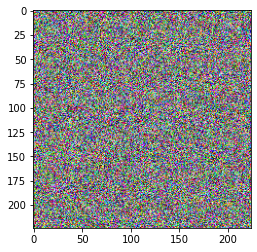

In [16]:
import matplotlib.pyplot as plt


plt.imshow(images[30])